<a href="https://colab.research.google.com/github/MurtazAlek/MLDM-2021/blob/main/Murtazina_%22MLDM_2021_seminar02_homework%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Please, fill in before you start:
First Name: **Aleksandra**

Last Name: **Murtazina**

Group:

In [48]:
import numpy as np
import matplotlib.pyplot as plt

## Task 1 (3 points)

Consider the following toy dataset:

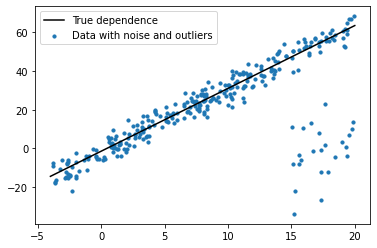

In [49]:
true_function = lambda x: 3.25 * x - 1.47
noize_function = lambda x: (
    np.random.normal(size=len(x)) * 4. +
    np.where(
        x < 15,
        0.,
        -60 + np.random.normal(size=len(x)) * 10
    ) * (np.random.uniform(size=len(x)) < 0.4).astype(int)
)
limits = (-4., 20.)

def generate_dataset(N=300):
  x = np.random.uniform(*limits, size=N)
  y = true_function(x) + noize_function(x)

  return x[:,None], y

X, y = generate_dataset()

x = np.linspace(*limits, 101)
plt.plot(x, true_function(x), c='black', label='True dependence')
plt.scatter(X, y, s=10, label='Data with noise and outliers')
plt.legend();

Implement a linear model $\hat y(x|w) = w_1\cdot x + w_0$ with MAE loss:
$$\text{MAE}(w) = \frac{1}{N}\sum_{i=1}^N\left|y_i - \hat y(x_i|w)\right|,$$
using gradient descent optimization in `numpy`.

*Hint: introduce a constant feature to account for the bias term to make the formulas simpler.*

Plot the learning curve and the final fit. Also, fit the same data with `sklearn`'s `LinearRegression`, and compare the two fits on the same plot. What do you observe? Write a short comment.

In [50]:
import pandas as pd
from mpl_toolkits.mplot3d import axes3d
from numpy import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor


def losss(X, y, w0, w1):
    return (np.abs(y-(w0*np.ones(X.shape)+w1*X).reshape(y.shape))).mean()

X, y = generate_dataset(400)

lin_reg=LinearRegression()
SGD_reg=SGDRegressor(loss='squared_loss',eta0=0.0001)
lin_reg.fit(X,y)
SGD_reg.fit(X,y)


# w0_mesh = np.linspace(-25, 25,200)
# w1_mesh = np.linspace(-10, 10,200)


# ww0, ww1 = np.meshgrid(w0_mesh, w1_mesh)
# loss_mesh = []
# for j in range(len(w1_mesh)):
#     loss_mesh.append([])
#     for i in range(len(w0_mesh)):
#          loss_mesh[j].append((np.abs(y-(ww0[j][i]*np.ones(X.shape)+
#                                         ww1[j][i]*X).reshape(y.shape))).mean())
# loss_mesh = np.array(loss_mesh)




SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.0001, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [51]:
def loss_func(X_b,y,w):
    return (np.abs(y-(X_b.dot(w).reshape(y.shape)))).mean()

def loss_func_der(X_b,y,w):
    return ((((np.sign(y-(X_b.dot(w)).reshape(y.shape))).T).dot(X_b)).T).mean()

def column(massiv, i):
    return np.array([row[i] for row in massiv])

In [52]:
eta=0.0001
n_epochs=40
w_first=np.random.randn(2,1)

def loss_grad(X,y):
  X_b=np.c_[np.ones((len(X),1),dtype=np.float64),X]
  w_epochs = [w_first]
  w_next = w_first
  for i in range(n_epochs):
    w_next = w_next +eta*loss_func_der(X_b,y,w_next)
    w_epochs.append(w_next)
  w_epochs=np.array(w_epochs)


  loss_func_epochs = []
  for i in range(len(w_epochs)):
    loss_func_epochs.append(loss_func(X_b,y,w_epochs[i]))
  loss_func_epochs = np.array(loss_func_epochs)
  return w_epochs, loss_func_epochs

In [53]:
w_epochs=loss_grad(X,y)[0]
loss_func_epochs=loss_grad(X,y)[1]


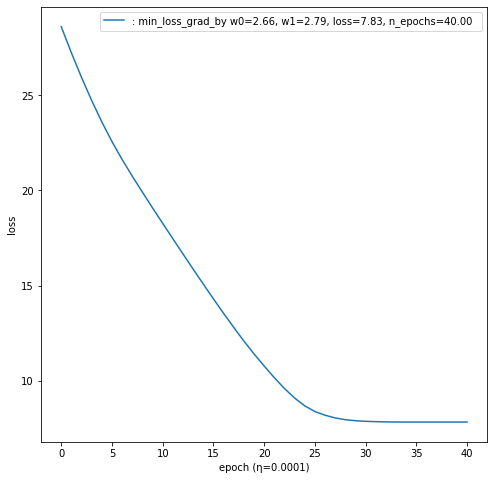

In [54]:
plt.figure(figsize=(8,8))
plt.plot(range(len(loss_func_epochs)), loss_func_epochs,
         label=': min_loss_grad_by w0=%0.2f, w1=%0.2f, loss=%0.2f, n_epochs=%0.2f  ' 
         % (w_epochs[np.argmin(loss_func_epochs)][0],
        w_epochs[np.argmin(loss_func_epochs)][1],
        loss_func_epochs[np.argmin(loss_func_epochs)],n_epochs))

plt.xlabel(u'epoch (η=%s)'%eta)
plt.ylabel(u'loss')
plt.legend(loc='upper right')
plt.legend()
plt.show()

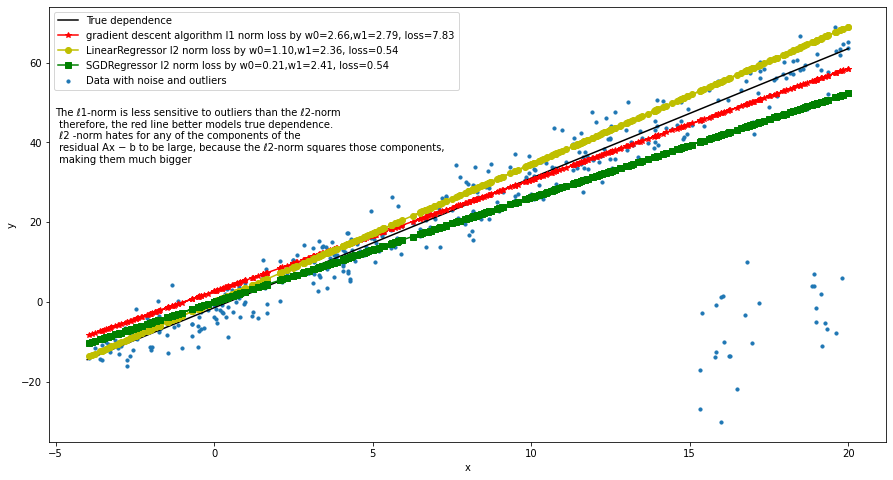

In [55]:
X_b=np.c_[np.ones((len(X),1),dtype=np.float64),X]

x = np.linspace(*limits, 101)
fig_4 = plt.figure(figsize=(15,8))
ax_1=fig_4.add_subplot(111)
ax_1.plot(x, true_function(x), c='black', label='True dependence')
ax_1.scatter(X, y, s=10, label='Data with noise and outliers')
ax_1.plot(X,X_b.dot(w_epochs[np.argmin(loss_func_epochs)]),color='red',marker='*',label='gradient descent algorithm l1 norm loss by w0=%0.2f,'
                                                                                        'w1=%0.2f, loss=%0.2f'%
                                                                                        (w_epochs[np.argmin(loss_func_epochs)][0],
                                                                   w_epochs[np.argmin(loss_func_epochs)][1],
                                                                   loss_func_epochs[np.argmin(loss_func_epochs)]))
ax_1.plot(X,lin_reg.intercept_*X+lin_reg.coef_*X,color='y',marker='o',label='LinearRegressor l2 norm loss by w0=%0.2f,'
                                                                            'w1=%0.2f, loss=%0.2f'%
                                                                            (lin_reg.intercept_,(lin_reg.coef_[0]),lin_reg.score(X,y)))
ax_1.plot(X,SGD_reg.intercept_*X+SGD_reg.coef_*X,color='green',marker='s',label='SGDRegressor l2 norm loss by w0=%0.2f,'
                                                                            'w1=%0.2f, loss=%0.2f'%
                                                                            (SGD_reg.intercept_,(SGD_reg.coef_[0]),SGD_reg.score(X,y)))
ax_1.text(-5,35,'The ℓ1-norm is less sensitive to outliers than the ℓ2-norm \n therefore, the red line better models true dependence.\n ℓ2 -norm hates for any of the components of the \n residual Ax − b to be large, because the ℓ2-norm squares those components, \n making them much bigger')
ax_1.set_xlabel('x')
ax_1.set_ylabel('y')
ax_1.legend()

plt.show()

## Task 2 (2 points + 1 bonus point + 1 super-bonus point)

(Titanic data again)

Build a model with `sklearn`'s `LogisticRegression` to get the accuracy of at least 0.80 (0.82 for the bonus point, 0.85 for the super-bonus point) on the test set.

Some (optional) suggestions:
- Add new features (e.g. missing value indicator columns)
- Fill missing values
- Encode categorical features (e.g. one-hot encoding)
- Scale the features (e.g. with standard or robust scaler)
- Think of other ways of preprocessing the features (e.g. `Fare` $\to$ `log(Fare)`)
- Try adding polynomial features



In [35]:
!wget https://raw.githubusercontent.com/HSE-LAMBDA/MLDM-2021/main/01-intro/train.csv

--2021-10-01 10:56:37--  https://raw.githubusercontent.com/HSE-LAMBDA/MLDM-2021/main/01-intro/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60302 (59K) [text/plain]
Saving to: ‘train.csv.1’

train.csv.1         100%[===================>]  58.89K  --.-KB/s    in 0.008s  

2021-10-01 10:56:37 (7.15 MB/s) - ‘train.csv.1’ saved [60302/60302]



In [36]:
import pandas as pd
data = pd.read_csv("train.csv", index_col='PassengerId')
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### About the data
Here's some of the columns
* Name - a string with person's full name
* Survived - 1 if a person survived the shipwreck, 0 otherwise.
* Pclass - passenger class. Pclass == 3 is cheap'n'cheerful, Pclass == 1 is for moneybags.
* Sex - a person's gender
* Age - age in years, if available
* SibSp - number of siblings on a ship
* Parch - number of parents on a ship
* Fare - ticket cost
* Embarked - port where the passenger embarked
 * C = Cherbourg; Q = Queenstown; S = Southampton

In [38]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,LassoCV, Ridge
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import matplotlib.pyplot as plt
import seaborn as sns
import re

def feature_selection_and_preprocessing(data):
    features = data.copy()

    deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}

    features['Cabin'] = features['Cabin'].fillna("U0")
    features['Deck'] = features['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    features['Deck'] = features['Deck'].map(deck)
    features['Deck'] = features['Deck'].fillna(0)
    features['Deck'] = features['Deck'].astype(int)

    titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

    features['Title'] = features.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    features['Title'] = features['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr','Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    features['Title'] = features['Title'].replace('Mlle', 'Miss')
    features['Title'] = features['Title'].replace('Ms', 'Miss')
    features['Title'] = features['Title'].replace('Mme', 'Mrs')
    features['Title'] = features['Title'].map(titles)
    features['Title'] = features['Title'].fillna(0)

    features['family'] = features['SibSp'] + features['Parch']

    features['Age'] = features['Age'].interpolate(method='linear', inplace=False)
    features['Age'] = features['Age'].fillna(features["Age"].mean())
    features["Age"] = features["Age"].astype(int)

    features.loc[features['Age'] <= 11, 'Age'] = 0
    features.loc[(features['Age'] > 11) & (features['Age'] <= 18), 'Age'] = 1
    features.loc[(features['Age'] > 18) & (features['Age'] <= 22), 'Age'] = 2
    features.loc[(features['Age'] > 22) & (features['Age'] <= 27), 'Age'] = 3
    features.loc[(features['Age'] > 27) & (features['Age'] <= 33), 'Age'] = 4
    features.loc[(features['Age'] > 33) & (features['Age'] <= 40), 'Age'] = 5
    features.loc[(features['Age'] > 40) & (features['Age'] <= 66), 'Age'] = 6
    features.loc[features['Age'] > 66, 'Age'] = 7

    features['Fare_Per_Person'] = features['Fare'] / (features['family'] + 1)
    features['Fare_Per_Person'] = features['Fare_Per_Person'].astype(int)

    features['Fare'] = features['Fare'].fillna(features["Fare"].mean())
    features.loc[features['Fare'] <= 7.91, 'Fare'] = 0
    features.loc[(features['Fare'] > 7.91) & (features['Fare'] <= 14.454), 'Fare'] = 1
    features.loc[(features['Fare'] > 14.454) & (features['Fare'] <= 31), 'Fare'] = 2
    features.loc[(features['Fare'] > 31) & (features['Fare'] <= 99), 'Fare'] = 3
    features.loc[(features['Fare'] > 99) & (features['Fare'] <= 250), 'Fare'] = 4
    features.loc[features['Fare'] > 250, 'Fare'] = 5
    features['Fare'] = (features['Fare']).astype(int)

    features['Sex'] = features['Sex'].replace({"male": int(0), "female": int(1)}, inplace=False)

    features['Embarked'] = features['Embarked'].fillna('S')
    dummy_e = pd.get_dummies(features['Embarked'])
    features = pd.merge(features, dummy_e, left_index=True, right_index=True)
    features.rename(columns={'C': 'Embarked_C', 'S': 'Embarked_S', 'Q': 'Embarked_Q'}, inplace=False)

    features['Pclass'] = features['Pclass'].fillna(3)
    dummy_p = pd.get_dummies(features['Pclass'])
    features = pd.merge(features, dummy_p, left_index=True, right_index=True)


    label = ['Embarked', 'Cabin','Name','Ticket','SibSp','Parch','Title', 'Pclass','C','Q',2,1, 'Fare_Per_Person']
    features = features.drop(labels=label, axis=1)


    return features





model = LogisticRegression(solver='liblinear')


# Validation code (do not touch)
data = pd.read_csv("train.csv", index_col='PassengerId')
data_train, data_test = train_test_split(data, test_size=200, random_state=42)

model.fit(
    feature_selection_and_preprocessing(
        data_train.drop('Survived', axis=1)
    ),
    data_train['Survived']
)

train_predictions = model.predict(
    feature_selection_and_preprocessing(
        data_train.drop('Survived', axis=1)
    )
)

test_predictions = model.predict(
    feature_selection_and_preprocessing(
        data_test.drop('Survived', axis=1)
    )
)

print("Train accuracy:", accuracy_score(
    data_train['Survived'],
    train_predictions
))
print("Test accuracy:", accuracy_score(
    data_test['Survived'],
    test_predictions
))




Train accuracy: 0.8031837916063675
Test accuracy: 0.82
